In [1]:
#Install some important libraries
!pip install matplotlib
!pip install scikit-surprise

     |████████████████████████████████| 11.8MB 330kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670922 sha256=03b629a88dea69b964f4f5156992b025b7b3abe4124091cd8370a2b9cd65c3fe
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [2]:
#Import the libraries required
import pandas as pd
from surprise import Reader, Dataset, SVD
from surprise.accuracy import rmse, mae
from surprise.model_selection import cross_validate

In [26]:
#read the data provided and drop timestamp column from it
df=pd.read_csv("ratings.csv")
df.head()
df.drop("timestamp",axis=1)

,userId,movieId,rating
0,1,16,4.0
1,1,24,1.5
2,1,32,4.0
3,1,47,4.0
4,1,50,4.0
...,...,...,...
105334,668,142488,4.0
105335,668,142507,3.5
105336,668,143385,4.0
105337,668,144976,2.5


In [4]:
#missing values in the dataset
df.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [7]:
#Total number of unique users
no_movies=df["movieId"].nunique()
no_movies

10325

In [8]:
#Total number of unique users
no_users=df["movieId"].nunique()
no_users

10325

In [9]:
#Calculate sparsity
available_ratings=df["rating"].count()
total_ratings=no_movies*no_users
missing_values=total_ratings-available_ratings
sparsity=(missing_values/total_ratings)*100
sparsity

99.90118814086968

Since here sparsity is 98.47 hence our data is good.

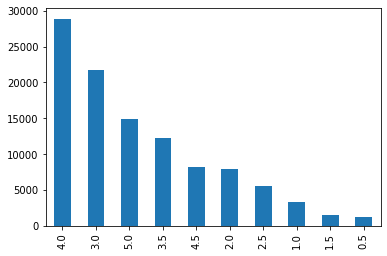

In [10]:
#Plot graph of user ratings by using matplotlib library
df["rating"].value_counts().plot(kind="bar")

In [11]:
#filter movies which are rated by the users more then thrice
filter_movies = df["movieId"].value_counts()>3
filter_movies=filter_movies[filter_movies].index.tolist()
#it will keep only those movies who are rated more than thrice

In [12]:
#we remove those user who rated less than 3 movies
filter_users=df["userId"].value_counts() > 3
filter_users=filter_users[filter_users].index.tolist()

In [13]:
#print original shpae
df.shape

(105339, 4)

In [14]:
#Remove rarely rated movies  and users
df=df[(df["movieId"].isin(filter_movies))& (df["userId"].isin(filter_users))]

In [15]:
#print new shpae
df.shape

(96277, 4)

In [16]:
#columns for training:
cols=['userId',"movieId","rating"]

In [17]:
#create surprise data set
reader = Reader(rating_scale = (0.5,5))
data = Dataset.load_from_df(df[cols],reader)


In [18]:
#Now create tarin set and prediction set
trainset=data.build_full_trainset()
antiset=trainset.build_anti_testset()

In [19]:
# Create model by using singular value decomposition
algo=SVD(n_epochs=30,verbose=True)

In [20]:
# Train the model
cross_validate(algo,data,measures=['RMSE','MAE'],cv=5,verbose=True)
print("We are done with our training")

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20


Here we get mean RMSE as 0.8636 and mean MAE as 0.6638 which means we differ from our actual ratings on an average by 0.6638 which is preety good.


In [21]:
#Predicit ratings for user and items that are not in training set
recommendations = algo.test(antiset)


In [24]:
#Ask user to enter userId to get movies recommendations
input_user_for_recommendations = int(input("Enter user I'd from 1 to 668"))
recommendations[input_user_for_recommendations]
#Here uid is userId, iid is MovieId and r_ui is estimated rating and est is the estimated/predicted rating.

Enter user I'd from 1 to 668456


Prediction(uid=1, iid=585, r_ui=3.557215118875744, est=2.556264831757462, details={'was_impossible': False})

In [32]:
# Recommend top five movies to every users
from collections import defaultdict
def get_top_n(recommendations,n):
  top_n=defaultdict(list)
  for uid,iid,_,est,_ in recommendations:
    top_n[uid].append((iid,est))
  for uid,user_ratings in top_n.items():
    user_ratings.sort(key=lambda x:x[1], reverse=True)
    top_n[uid]=user_ratings[:n]
  return top_n
  pass
top_n=get_top_n(recommendations,n=5)
for uid,user_ratings in top_n.items():
  print(uid, [iid for (iid, rating) in  user_ratings])



1 [1217, 750, 1276, 6, 4226]
2 [527, 858, 3000, 908, 923]
3 [858, 7099, 913, 1921, 1719]
4 [7099, 5952, 2858, 6539, 1234]
5 [858, 1292, 1221, 162, 1188]
6 [318, 527, 593, 1213, 2728]
7 [318, 2132, 1287, 7099, 457]
8 [608, 1252, 923, 908, 2571]
9 [1172, 290, 1276, 6502, 2997]
10 [1221, 527, 7099, 2997, 1197]
11 [7099, 923, 318, 1197, 3000]
12 [1233, 7153, 6539, 2571, 1097]
13 [44555, 527, 541, 1719, 1945]
14 [50, 858, 61240, 1196, 318]
15 [16, 110, 260, 318, 356]
16 [858, 912, 1221, 2728, 48516]
17 [1172, 3967, 42418, 1213, 1212]
18 [1199, 2329, 1207, 2324, 1219]
19 [2941, 1732, 2395, 1, 1196]
20 [44555, 5618, 3967, 1220, 1210]
21 [1193, 858, 923, 1945, 2728]
22 [318, 3000, 1172, 926, 1235]
23 [527, 3000, 1207, 44555, 3949]
24 [356, 318, 541, 2762, 92259]
25 [2804, 593, 7438, 318, 589]
26 [318, 296, 923, 7099, 44555]
27 [541, 5971, 6016, 68954, 1172]
28 [50, 110, 1188, 4235, 2905]
29 [1213, 2959, 4235, 750, 27611]
30 [44555, 7099, 1235, 2324, 1950]
31 [1193, 50, 1212, 923, 1284]
32 [709